In [1]:
import numpy as np

import numpy as np
import json

from stochastic_arrival_times.fjsp_env.debug_gantt_chart import draw_gantt_chart, get_machine_op_durations, calculate_horizon_with_arrival_times
from evaluations.stochastic.benchmark import new_model, load_benchmark_release_times
from validate import validate_and_get_environment
from uniform_instance_gen import datasetConfigs

### 0. Set problem size

In [2]:
# Change this, either 1 to 10 based on Brandimarte problems (MK01 to MK10)
PROBLEM_SIZE = 1

if PROBLEM_SIZE > 10 or PROBLEM_SIZE < 1:
    raise Exception('PROBLEM_SIZE must be between 1 and 10')

### 1. Load model and load benchmark problem

In [3]:
# 1. Load weight
i = PROBLEM_SIZE - 1
weights = json.load(open('saved_weights.json'))['stochastic']
model = new_model(problem_size=i+1, weight_id=weights['MK{:02d}'.format(i+1)])


# 2. Load benchmark problem
problem = np.load('./evaluations/standard/brandimarte/brandimarte_dataset_numpy/MK{:02d}.fjs.npy'.format(i+1))
ub_ops = datasetConfigs["MK{:02d}".format(i+1)].highest_num_of_operations_per_job

release_times = load_benchmark_release_times(PROBLEM_SIZE)

### 2. Get Makespan

In [4]:
makespan, env = validate_and_get_environment(validation=problem, model=model, ub_num_of_operations_per_job=ub_ops, release_times=release_times)
makespan *= -1

makespan

73.0

### 3. Visualize schedule

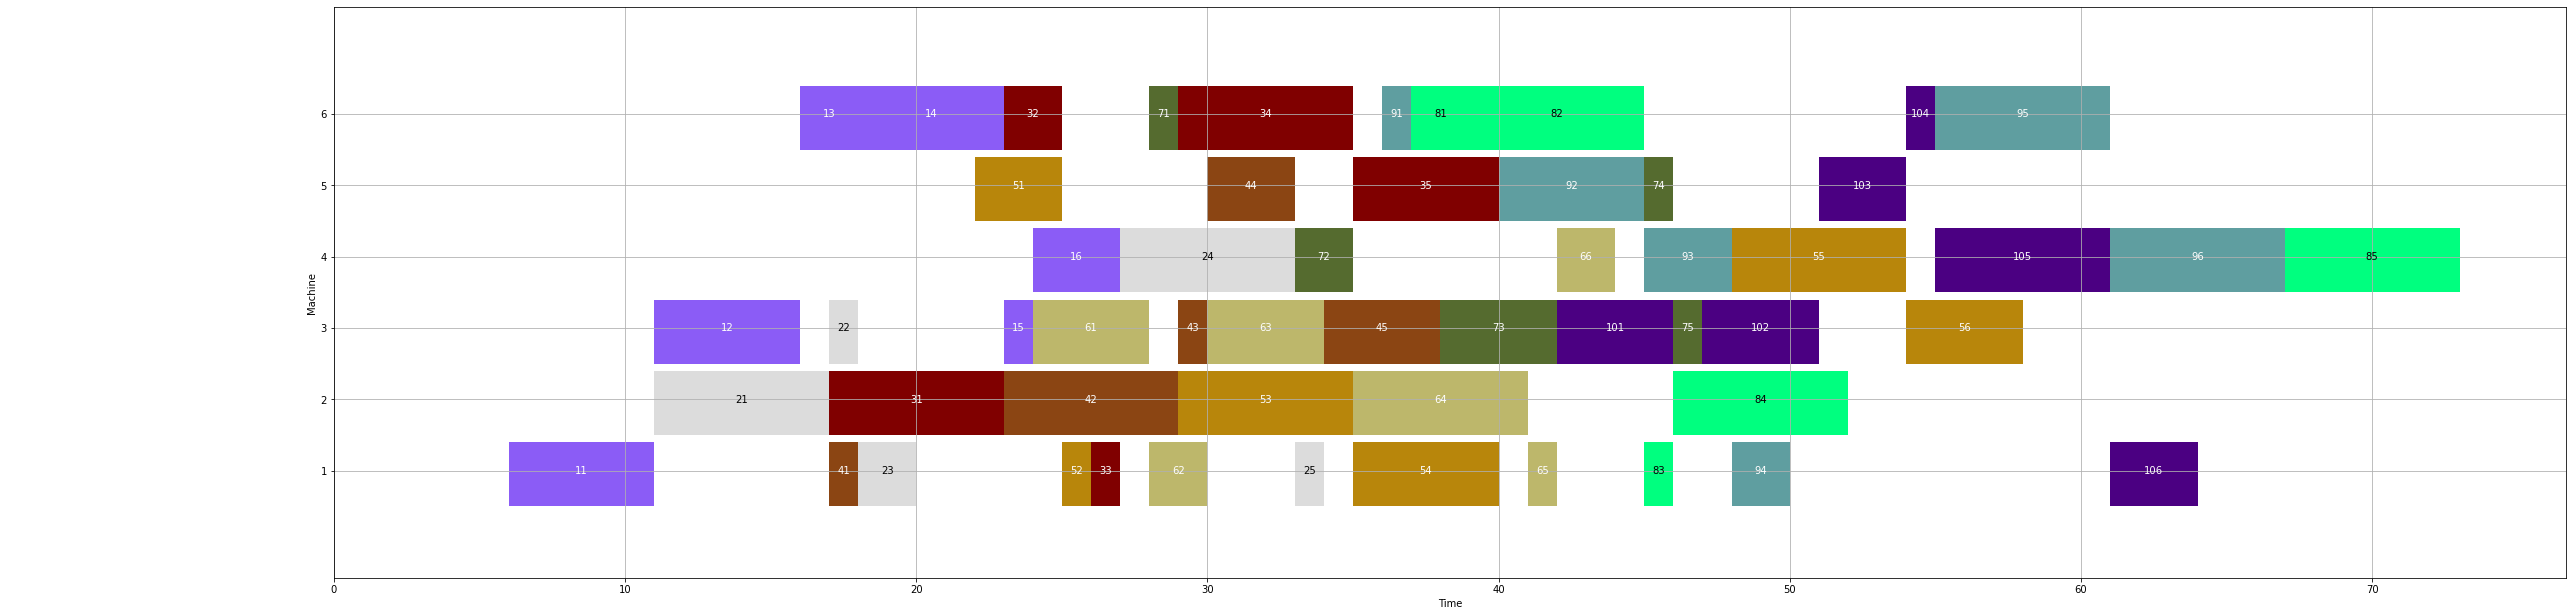

In [5]:
horizon = makespan * 1.05
machine_op_durations = get_machine_op_durations(
    env.machine_op_ids,
    env.jobs,
    env.op_id_to_job_info
)

draw_gantt_chart(
    horizon,
    env.machine_start_times,
    machine_op_durations,
    env.machine_op_ids,
    env.op_id_to_job_info,
    env.number_of_jobs
)